In [1]:
import pandas as pd
from datasets import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tanjimtaharataurpa/bangla-math-entity-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bangla-math-entity-recognition


In [4]:
dataset_path_bangla = "/kaggle/input/bangla-math-entity-recognition/Bangla Mathematical Entity Recognition Dataset final.csv"
dataset_path_english= "/kaggle/input/bangla-math-entity-recognition/Bangla Mathematical Entity Recognition Dataset final english.csv"

In [5]:
# Load the dataset into a DataFrame
dataset_bangla = pd.read_csv(dataset_path_bangla)
dataset_bangla.head()


,0,এক আর দুই যোগ করলে তিন হবে।,"এক, দুই, তিন",Number
0,1,এক আর দুই যোগ করলে তিন হবে।,যোগ,Operator
1,3,এক আর দুই যোগ করলে তিন হবে।,আর করলে হবে,Others
2,4,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,"পাঁচ, একশ বিশ",Number
3,5,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,ফ্যাক্টরিয়ালের,Operator
4,7,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,মান,Others


In [6]:
df1 = dataset_bangla.copy()

df1.columns = ['ID', 'Sentence', 'Math Entity', 'Label']

df1.head()

,ID,Sentence,Math Entity,Label
0,1,এক আর দুই যোগ করলে তিন হবে।,যোগ,Operator
1,3,এক আর দুই যোগ করলে তিন হবে।,আর করলে হবে,Others
2,4,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,"পাঁচ, একশ বিশ",Number
3,5,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,ফ্যাক্টরিয়ালের,Operator
4,7,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,মান,Others


In [7]:
dataset_english = pd.read_csv(dataset_path_english)
dataset_english.head()

,0,Adding one and two makes three.,"One, two, three",Number
0,1,Adding one and two makes three.,added,Operator
1,3,Adding one and two makes three.,And if you do,Others
2,4,The value of the factorial of five is one hun...,"Five, one hundred and twenty",Number
3,5,The value of the factorial of five is one hun...,of the factorial,Operator
4,7,The value of the factorial of five is one hun...,value,Others


In [8]:
df2 = dataset_english.copy()

df2.columns = ['ID', 'Sentence', 'Math Entity', 'Label']

df2.head()

,ID,Sentence,Math Entity,Label
0,1,Adding one and two makes three.,added,Operator
1,3,Adding one and two makes three.,And if you do,Others
2,4,The value of the factorial of five is one hun...,"Five, one hundred and twenty",Number
3,5,The value of the factorial of five is one hun...,of the factorial,Operator
4,7,The value of the factorial of five is one hun...,value,Others


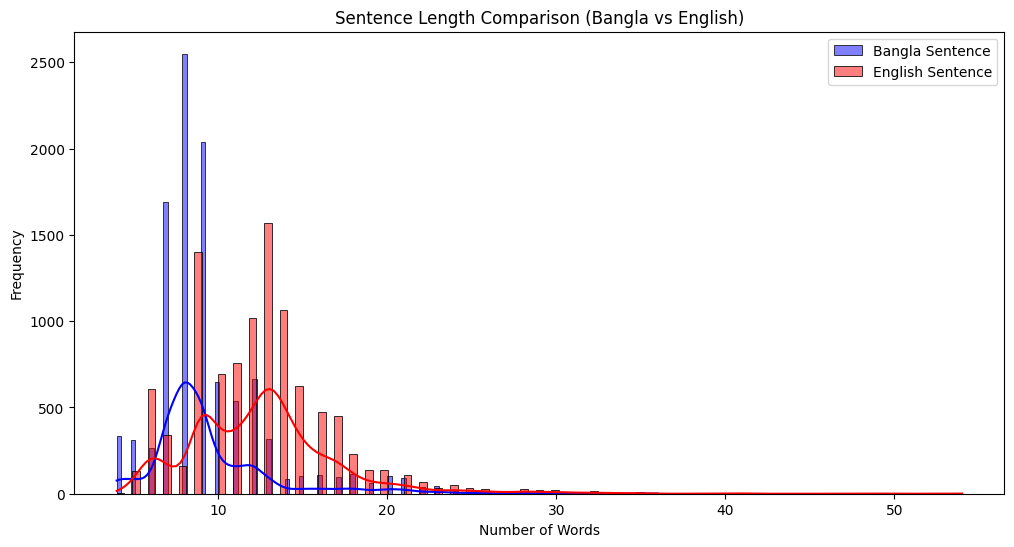

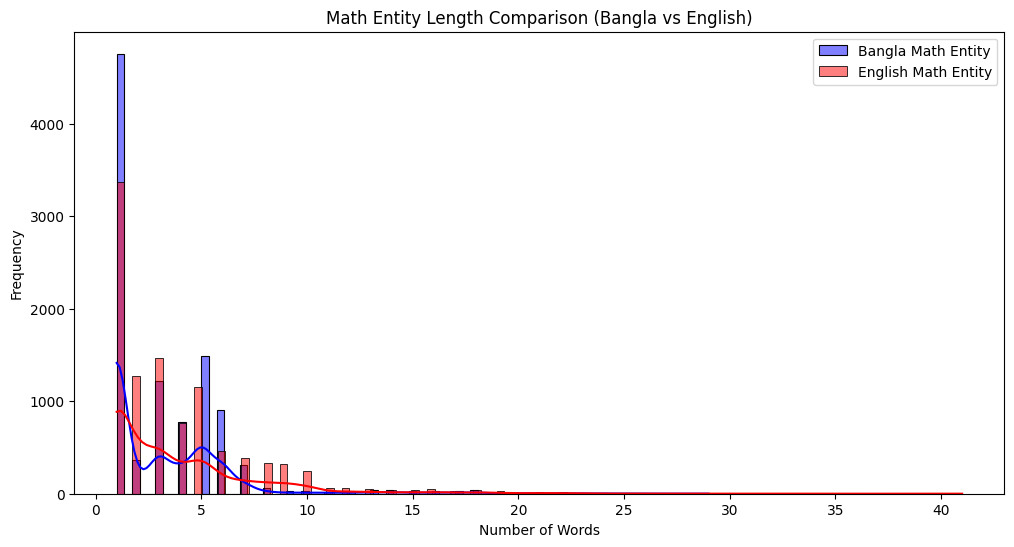

([('বর গম', 2538),
  ('গম দশম', 909),
  ('দশম এক', 612),
  ('দশম ছয়', 591),
  ('নব বই', 579),
  ('করল হব', 559),
  ('দশম আট', 558),
  ('যখন একশ', 545),
  ('আমর যখন', 483),
  ('দশম যখন', 444)],
 [('বর গম দশম', 909),
  ('বর গম ইশ', 288),
  ('গম ইশ দশম', 270),
  ('টর এক দশম', 237),
  ('যখন একশ আর', 233),
  ('তর বর গম', 231),
  ('বইয় বর গম', 225),
  ('নব বইয় বর', 210),
  ('আমর দশম যখন', 183),
  ('এর বর গম', 180)],
 [('hundred and', 2820),
  ('we get', 2600),
  ('when we', 2543),
  ('the square', 2539),
  ('square root', 2538),
  ('root of', 2538),
  ('value of', 2511),
  ('of the', 2142),
  ('the value', 2118),
  ('one hundred', 1920)],
 [('square root of', 2538),
  ('the square root', 2535),
  ('the value of', 2118),
  ('value of the', 2037),
  ('of the square', 1041),
  ('the factorial of', 1002),
  ('of the factorial', 978),
  ('when we divide', 960),
  ('one hundred and', 954),
  ('when we subtract', 660)])

In [9]:
# Method to calculate word count 
def calculate_word_count(text):
    return len(text.split())

# Function to get n-grams from text
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Calculate Sentence and Token length using the calculate word count
df1['sentence_length'] = df1['Sentence'].apply(calculate_word_count)
df1['math_entity_length'] = df1['Math Entity'].apply(calculate_word_count)

df2['sentence_length'] = df2['Sentence'].apply(calculate_word_count)
df2['math_entity_length'] = df2['Math Entity'].apply(calculate_word_count)

# Plotting the histogram for headline lengths
plt.figure(figsize=(12, 6))
sns.histplot(df1['sentence_length'], label='Bangla Sentence', color='blue', kde=True)
sns.histplot(df2['sentence_length'], label='English Sentence', color='red', kde=True)
plt.title('Sentence Length Comparison (Bangla vs English)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting the histogram for content lengths
plt.figure(figsize=(12, 6))
sns.histplot(df1['math_entity_length'], label='Bangla Math Entity', color='blue', kde=True)
sns.histplot(df2['math_entity_length'], label='English Math Entity', color='red', kde=True)
plt.title('Math Entity Length Comparison (Bangla vs English)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Now, let's extract and display the bigrams and trigrams from the Sentences of both datasets
top_bigrams_bangla = get_top_ngrams(df1['Sentence'], n=10, ngram_range=(2, 2))
top_trigrams_bangla = get_top_ngrams(df1['Sentence'], n=10, ngram_range=(3, 3))

top_bigrams_english = get_top_ngrams(df2['Sentence'], n=10, ngram_range=(2, 2))
top_trigrams_english = get_top_ngrams(df2['Sentence'], n=10, ngram_range=(3, 3))

top_bigrams_bangla, top_trigrams_bangla, top_bigrams_english, top_trigrams_english


In [57]:
bng_df = df1.copy()
eng_df = df2.copy()

In [58]:
print(bng_df.columns)
print(eng_df.columns)


Index(['ID', 'Sentence', 'Math Entity', 'Label', 'sentence_length',
       'math_entity_length'],
      dtype='object')
Index(['ID', 'Sentence', 'Math Entity', 'Label', 'sentence_length',
       'math_entity_length'],
      dtype='object')


In [59]:
bng_df = bng_df.drop(columns=["sentence_length", "math_entity_length"])
eng_df = eng_df.drop(columns=["sentence_length", "math_entity_length"])


In [60]:
dataset = pd.merge(bng_df, eng_df, on='ID', suffixes=('_bangla', '_english'))
dataset.head()

,ID,Sentence_bangla,Math Entity_bangla,Label_bangla,Sentence_english,Math Entity_english,Label_english
0,1,এক আর দুই যোগ করলে তিন হবে।,যোগ,Operator,Adding one and two makes three.,added,Operator
1,3,এক আর দুই যোগ করলে তিন হবে।,আর করলে হবে,Others,Adding one and two makes three.,And if you do,Others
2,4,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,"পাঁচ, একশ বিশ",Number,The value of the factorial of five is one hun...,"Five, one hundred and twenty",Number
3,5,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,ফ্যাক্টরিয়ালের,Operator,The value of the factorial of five is one hun...,of the factorial,Operator
4,7,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,মান,Others,The value of the factorial of five is one hun...,value,Others


In [61]:
print(dataset.columns)


Index(['ID', 'Sentence_bangla', 'Math Entity_bangla', 'Label_bangla',
       'Sentence_english', 'Math Entity_english', 'Label_english'],
      dtype='object')


In [62]:
# Drop the specified columns
dataset.drop(columns=['Label_english'], inplace=True)

dataset.tail()


,ID,Sentence_bangla,Math Entity_bangla,Label_bangla,Sentence_english,Math Entity_english
10276,13708,আমরা একশো ঊনষাট পাই যখন একশো আর ঊনষা...,"একশো ঊনষাট , একশো, ঊনষাট",Number,We get one hundred and sixty-nine when we add...,"One hundred and sixty nine, one hundred and s..."
10277,13709,আমরা একশো ঊনষাট পাই যখন একশো আর ঊনষা...,যোগ,Operator,We get one hundred and sixty-nine when we add...,added
10278,13711,আমরা একশো ঊনষাট পাই যখন একশো আর ঊনষা...,আমরা পাই যখন আর করি,Others,We get one hundred and sixty-nine when we add...,We get when and do
10279,13712,আমরা একশো ষাট পাই যখন একশো আর ষাট য...,"একশো ষাট, একশো, ষাট",Number,We get one hundred and sixty when we add one ...,"One hundred and sixty, one hundred and sixty"
10280,13713,আমরা একশো ষাট পাই যখন একশো আর ষাট য...,যোগ,Operator,We get one hundred and sixty when we add one ...,added


In [63]:
# Reorder the columns
dataset = dataset[['ID', 'Sentence_bangla', 'Math Entity_bangla', 'Sentence_english', 'Math Entity_english', 'Label_bangla']]

dataset.head()


,ID,Sentence_bangla,Math Entity_bangla,Sentence_english,Math Entity_english,Label_bangla
0,1,এক আর দুই যোগ করলে তিন হবে।,যোগ,Adding one and two makes three.,added,Operator
1,3,এক আর দুই যোগ করলে তিন হবে।,আর করলে হবে,Adding one and two makes three.,And if you do,Others
2,4,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,"পাঁচ, একশ বিশ",The value of the factorial of five is one hun...,"Five, one hundred and twenty",Number
3,5,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,ফ্যাক্টরিয়ালের,The value of the factorial of five is one hun...,of the factorial,Operator
4,7,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,মান,The value of the factorial of five is one hun...,value,Others


In [64]:
# Merge Bangla and English sentences along with Math Entity columns
dataset["text"] = (
    dataset["Sentence_bangla"] + " [SEP] " + dataset["Sentence_english"] + 
    " [SEP] " + dataset["Math Entity_bangla"] + " [SEP] " + dataset["Math Entity_english"]
)

# Rename the column
dataset.rename(columns={'Label_bangla': 'Label'}, inplace=True)

# Display the first few rows
dataset.head()


,ID,Sentence_bangla,Math Entity_bangla,Sentence_english,Math Entity_english,Label,text
0,1,এক আর দুই যোগ করলে তিন হবে।,যোগ,Adding one and two makes three.,added,Operator,এক আর দুই যোগ করলে তিন হবে। [SEP] Adding one a...
1,3,এক আর দুই যোগ করলে তিন হবে।,আর করলে হবে,Adding one and two makes three.,And if you do,Others,এক আর দুই যোগ করলে তিন হবে। [SEP] Adding one a...
2,4,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,"পাঁচ, একশ বিশ",The value of the factorial of five is one hun...,"Five, one hundred and twenty",Number,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ। [SEP] The ...
3,5,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,ফ্যাক্টরিয়ালের,The value of the factorial of five is one hun...,of the factorial,Operator,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ। [SEP] The ...
4,7,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ।,মান,The value of the factorial of five is one hun...,value,Others,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ। [SEP] The ...


In [18]:
dataset.columns

Index(['ID', 'Sentence_bangla', 'Math Entity_bangla', 'Sentence_english',
       'Math Entity_english', 'Label', 'text'],
      dtype='object')

In [65]:
columns_to_remove = [
    'ID', 'Sentence_bangla', 'Math Entity_bangla', 'Sentence_english', 
    'Math Entity_english'
]

# Drop the specified columns
dataset = dataset.drop(columns=columns_to_remove)

# Display the updated dataset
dataset.head()


,Label,text
0,Operator,এক আর দুই যোগ করলে তিন হবে। [SEP] Adding one a...
1,Others,এক আর দুই যোগ করলে তিন হবে। [SEP] Adding one a...
2,Number,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ। [SEP] The ...
3,Operator,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ। [SEP] The ...
4,Others,পাঁচের ফ্যাক্টরিয়ালের মান একশ বিশ। [SEP] The ...


In [66]:
# Convert to Hugging Face Dataset
dataset_hf = Dataset.from_pandas(dataset)

# Display dataset
print(dataset_hf)


Dataset({
    features: ['Label', 'text'],
    num_rows: 10281
})


In [67]:
# Define label mapping
label_mapping = {
    "Number": 0,
    "Operator": 1,
    "Common Mathematical Terms": 2,
    "Others": 3
}

# Function to encode labels
def encode_labels(example):
    return {"label": label_mapping[example["Label"]]}

# Apply encoding to the dataset
dataset_hf = dataset_hf.map(encode_labels)

# Display dataset features
print(dataset_hf)


Map:   0%|          | 0/10281 [00:00<?, ? examples/s]

Dataset({
    features: ['Label', 'text', 'label'],
    num_rows: 10281
})


In [68]:
dataset_hf = dataset_hf.remove_columns(["Label"])


In [69]:
print(dataset_hf)

Dataset({
    features: ['text', 'label'],
    num_rows: 10281
})


In [70]:
from sklearn.model_selection import train_test_split

# Step 2: Use the built-in split method for the Hugging Face Dataset
dataset_hf = dataset_hf.train_test_split(test_size=0.2, seed=3407)

train_dataset = dataset_hf["train"]
test_dataset = dataset_hf["test"]

# Step 3: From the 80% training set, further split 10% for validation
train_dataset = train_dataset.train_test_split(test_size=0.1, seed=3407)

val_dataset = train_dataset["test"]
train_dataset = train_dataset["train"]

# Check the sizes of the datasets
print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")


Train set size: 7401
Validation set size: 823
Test set size: 2057


In [49]:
%%capture
!pip install unsloth
!pip install --force-reinstall --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

In [55]:
from unsloth import FastLanguageModel

from unsloth import FastLanguageModel

max_seq_length = 512 
dtype = None 
load_in_4bit = True


model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/DeepSeek-R1-Distill-Qwen-1.5B-unsloth-bnb-4bit",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit, 
)


==((====))==  Unsloth 2025.1.8: Fast Qwen2 patching. Transformers: 4.48.2.
   \\   /|    GPU: Tesla P100-PCIE-16GB. Max memory: 15.888 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 6.0. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [56]:
model = FastLanguageModel.get_peft_model(
    model,
    r=16,  
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
    ],
    lora_alpha=16,
    lora_dropout=0,  
    bias="none",  
    use_gradient_checkpointing="unsloth",  # True or "unsloth" for very long context
    random_state=3407,
    use_rslora=False,  
    loftq_config=None,
)


In [71]:
# Step 4: Tokenize the datasets
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=max_seq_length)

# Tokenize the datasets with batch size 8
train_dataset = train_dataset.map(tokenize_function, batched=True, batch_size=8)
val_dataset = val_dataset.map(tokenize_function, batched=True, batch_size=8)
test_dataset = test_dataset.map(tokenize_function, batched=True, batch_size=8)


Map:   0%|          | 0/7401 [00:00<?, ? examples/s]

Map:   0%|          | 0/823 [00:00<?, ? examples/s]

Map:   0%|          | 0/2057 [00:00<?, ? examples/s]

In [72]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

# Initialize Trainer
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    dataset_num_proc=2,
    args=TrainingArguments(
        per_device_train_batch_size=4,
        gradient_accumulation_steps=2,
        warmup_steps=5,
        num_train_epochs=5,  # Run for 5 epochs
        learning_rate=2e-4,
        fp16=not is_bfloat16_supported(),
        bf16=is_bfloat16_supported(),
        logging_steps=10,  
        logging_dir="logs", 
        optim="adamw_8bit",
        weight_decay=0.01,
        lr_scheduler_type="linear",
        seed=3407,
        output_dir="outputs",
        report_to="none", 
    ),
)



In [73]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 7,401 | Num Epochs = 5
O^O/ \_/ \    Batch size per device = 4 | Gradient Accumulation steps = 2
\        /    Total batch size = 8 | Total steps = 4,625
 "-____-"     Number of trainable parameters = 18,464,768


Step,Training Loss
10,2.550700
20,1.699400
30,1.178000
40,1.030100
50,0.837400
60,0.681500
70,0.564500
80,0.591400
90,0.603500
100,0.550900


In [75]:
import shutil

# Define output directory
model_output_dir = "outputs"

# Save model
trainer.model.save_pretrained(model_output_dir)

# Save tokenizer using the original tokenizer instance
tokenizer.save_pretrained(model_output_dir)

print("Model and tokenizer saved successfully!")



Model and tokenizer saved successfully!


In [76]:
shutil.make_archive("deepseekr1_model_checkpoint", 'zip', model_output_dir)
print("Model zipped successfully!")


Model zipped successfully!


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_path = "path_to_extracted_folder"

model = AutoModelForCausalLM.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)


In [78]:
'''
%load_ext tensorboard
%tensorboard --logdir logs
'''

<IPython.core.display.Javascript object>

In [83]:
for log in trainer.state.log_history:
    print(log)


{'loss': 2.5507, 'grad_norm': 0.6973774433135986, 'learning_rate': 0.00019978354978354978, 'epoch': 0.010804970286331712, 'step': 10}
{'loss': 1.6994, 'grad_norm': 0.8195284605026245, 'learning_rate': 0.00019935064935064936, 'epoch': 0.021609940572663425, 'step': 20}
{'loss': 1.178, 'grad_norm': 0.6937539577484131, 'learning_rate': 0.00019891774891774892, 'epoch': 0.03241491085899514, 'step': 30}
{'loss': 1.0301, 'grad_norm': 0.720237672328949, 'learning_rate': 0.0001984848484848485, 'epoch': 0.04321988114532685, 'step': 40}
{'loss': 0.8374, 'grad_norm': 0.6544207334518433, 'learning_rate': 0.00019805194805194807, 'epoch': 0.05402485143165856, 'step': 50}
{'loss': 0.6815, 'grad_norm': 0.6659554839134216, 'learning_rate': 0.00019761904761904763, 'epoch': 0.06482982171799027, 'step': 60}
{'loss': 0.5645, 'grad_norm': 0.6360783576965332, 'learning_rate': 0.0001971861471861472, 'epoch': 0.075634792004322, 'step': 70}
{'loss': 0.5914, 'grad_norm': 0.6749631762504578, 'learning_rate': 0.0001

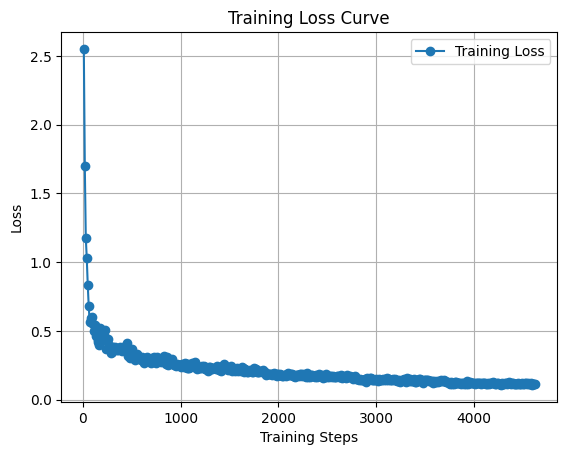

In [84]:
import matplotlib.pyplot as plt

# Extract step numbers and loss values
steps = [log["step"] for log in trainer.state.log_history if "loss" in log]
losses = [log["loss"] for log in trainer.state.log_history if "loss" in log]

# Plot the loss curve
plt.plot(steps, losses, label="Training Loss", marker="o")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show()


In [105]:
# Evaluate the model on the test set
test_results = trainer.evaluate(test_dataset)

# Print or log the results
print(test_results)


{'eval_loss': 0.15763162076473236, 'eval_runtime': 670.5679, 'eval_samples_per_second': 3.068, 'eval_steps_per_second': 3.068, 'epoch': 4.995137763371151}
